In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [2]:
from keras.models import load_model

In [7]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.style.use('seaborn')
def print_roc(validation_labels_enc,Y_val_pred):
  roc_log = roc_auc_score(validation_labels_enc,Y_val_pred)
  fpr, tpr, threshold = roc_curve(validation_labels_enc,Y_val_pred)
  random_probs = [0 for i in range(len(validation_labels_enc))]
  p_fpr, p_tpr, _ = roc_curve(validation_labels_enc, random_probs, pos_label=1)
  area_under_curve = auc(fpr, tpr)
  # matplotlib


# plot roc curves
  plt.plot(fpr, tpr, linestyle='--',color='orange', label='AUC = {:.3f}'.format(area_under_curve))
  plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
  # title
  plt.title('ROC curve')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')

  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();


  # plt.plot([0, 1], [0, 1], 'r--')
  # plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
  # plt.xlabel('False positive rate')
  # plt.ylabel('True positive rate')
  # plt.title('ROC curve')
  # plt.legend(loc='best')
  # plt.show()
  # #plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
  # plt.close()

In [26]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import math
def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_val_matrix.flatten())))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    print('Confusion Matrix : \n', cmx_data)

    total1=sum(sum(cmx_data))
#####from confusion matrix calculate accuracy
    accuracy1=(cmx_data[0,0]+cmx_data[1,1])/total1
    print ('Accuracy : ', accuracy1)

    sensitivity1 = cmx_data[0,0]/(cmx_data[0,0]+cmx_data[0,1])
    print('Sensitivity : ', sensitivity1 )

    specificity1 = cmx_data[1,1]/(cmx_data[1,0]+cmx_data[1,1])
    print('Specificity : ', specificity1)
    tp=cmx_data[0,0]
    tn=cmx_data[1,1]
    fp=cmx_data[1,0]
    fn=cmx_data[0,1]
    numerator = (tp * tn - fp * fn)
    denominator = math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    print('MCC : ', numerator / (denominator +  1e-07))
    Fscore=(tp)/(tp+0.5*(fp+fn))
    print('Fscore : ', Fscore)
    # MCC=(cmx_data[0,0]*cmx_data[1,1] - cmx_data[1,0]*cmx_data[0,1])/K.sqrt((cmx_data[0,0]+cmx_data[1,0])*(cmx_data[0,0]+cmx_data[0,1])*(cmx_data[1,1]+cmx_data[1,0])*(cmx_data[1,1]+cmx_data[0,1]))
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

   
    

    plt.figure(figsize = (10,7))
    sn.heatmap(df_cmx, annot=True,fmt='d')
    plt.show()

In [3]:
def my_preprocessor(datafilename_as_csv_inquotes):
    original_data = pd.read_csv(datafilename_as_csv_inquotes)
    original_data.isnull().values.any() #Gives false ie:No null value in dataset
    original_data = original_data.fillna(value=False)
    original_X = pd.DataFrame(original_data.drop(['defects'],axis=1))
    original_Y = original_data['defects']
    original_Y = pd.DataFrame(original_Y)
    x_train1, x_test, y_train1, y_test= train_test_split(original_X, original_Y, test_size = .1,
                                                              random_state=12)
    
    #now we resample, and from that we take training and validation sets
    
    sm = SMOTE(random_state=12, sampling_strategy= 1.0)
    x, y = sm.fit_resample(x_train1, y_train1)
    y_train2 = pd.DataFrame(y, columns=['defects'])
    x_train2 = pd.DataFrame(x, columns=original_X.columns)
    
    
    x_train, x_val, y_train, y_val= train_test_split(x_train2, y_train2, test_size = .1,
                                                              random_state=12)
    
    combined_training_data = x_train.copy()
    combined_training_data['defects'] = y_train 
    return original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val 

In [4]:
from imblearn.over_sampling import RandomOverSampler 
def my_preprocessor2(datafilename_as_csv_inquotes):
    original_data = pd.read_csv(datafilename_as_csv_inquotes)
    original_data.isnull().values.any() #Gives false ie:No null value in dataset
    original_data = original_data.fillna(value=False)
    original_X = pd.DataFrame(original_data.drop(['defects'],axis=1))
    original_Y = original_data['defects']
    original_Y = pd.DataFrame(original_Y)
    x_train1, x_test, y_train1, y_test= train_test_split(original_X, original_Y, test_size = .1,
                                                              random_state=12)
    
    #now we resample, and from that we take training and validation sets
    
    sm = RandomOverSampler(random_state=12)
    x, y = sm.fit_resample(x_train1, y_train1)
    y_train2 = pd.DataFrame(y, columns=['defects'])
    x_train2 = pd.DataFrame(x, columns=original_X.columns)
    
    
    x_train, x_val, y_train, y_val= train_test_split(x_train2, y_train2, test_size = .1,
                                                              random_state=12)
    
    combined_training_data = x_train.copy()
    combined_training_data['defects'] = y_train 
    return original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val 

In [8]:
from keras.models import Model
from keras.layers import Add, Activation, Concatenate, Conv2D, Dropout 
from keras.layers import Flatten, Input, GlobalAveragePooling2D, MaxPooling2D
import keras.backend as K
def create_fire_module(x, nb_squeeze_filter, name, use_bypass=False):
    """
    Creates a fire module
    
    Arguments:
        x                 : input
        nb_squeeze_filter : number of filters of squeeze. The filtersize of expand is 4 times of squeeze
        use_bypass        : if True then a bypass will be added
        name              : name of module e.g. fire123
    
    Returns:
        x                 : returns a fire module
    """
    
    nb_expand_filter = 4 * nb_squeeze_filter
    squeeze    = Conv2D(nb_squeeze_filter,(1,1), activation='relu', padding='same', name='%s_squeeze'%name)(x)
    expand_1x1 = Conv2D(nb_expand_filter, (1,1), activation='relu', padding='same', name='%s_expand_1x1'%name)(squeeze)
    expand_3x3 = Conv2D(nb_expand_filter, (3,3), activation='relu', padding='same', name='%s_expand_3x3'%name)(squeeze)
    
    axis = get_axis()
    x_ret = Concatenate(axis=axis, name='%s_concatenate'%name)([expand_1x1, expand_3x3])
    
    if use_bypass:
        x_ret = Add(name='%s_concatenate_bypass'%name)([x_ret, x])
        
    return x_ret


def get_axis():
    axis = -1 if K.image_data_format() == 'channels_last' else 1
    return axis

In [9]:
from keras import layers
def output(x, nb_classes):
    # x = Conv2D(nb_classes, (1,1), strides=(1,1), padding='valid', name='conv10')(x)
    # x = GlobalAveragePooling2D(name='avgpool10')(x)
    x = layers.Flatten()(x)
    x=layers.Dense(8,activation='relu')(x)
    x = layers.Dense(1,activation='sigmoid')(x)
    return x

In [11]:
import tensorflow as tf

In [16]:
def squeezeNet(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,dataset_name):
  x_train_matrix = x_train.values
  x_val_matrix = x_val.values
  y_train_matrix = y_train.values
  y_val_matrix = y_val.values
  ytrainseries = y_train['defects']
  yvalseries = y_val['defects']    
  img_rows, img_cols = 1,len(original_X.columns) 
  x_train1 = x_train_matrix.reshape(x_train_matrix.shape[0], img_rows, img_cols, 1)
  x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  input_img = Input(shape=input_shape)
  compression=1.0
  x = Conv2D(int(64*compression), (3,3), activation='relu', strides=(2,2), padding='same', name='conv1')(input_img)
  x = create_fire_module(x, int(16*compression), name='fire2')
  x = create_fire_module(x, int(16*compression), name='fire3')
  x = create_fire_module(x, int(32*compression), name='fire4')
  x = create_fire_module(x, int(32*compression), name='fire5')
  x = create_fire_module(x, int(48*compression), name='fire6')
  x = create_fire_module(x, int(48*compression), name='fire7')
  x = create_fire_module(x, int(64*compression), name='fire8')
  x = create_fire_module(x, int(64*compression), name='fire9')
  x = output(x, 2)
  model=Model(inputs=input_img, outputs=x)
  #compile model using accuracy to measure model performance
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  #train the model
  checkpoint_filepath = "/content/drive/My Drive/ASE/SqueezeNet/Best-Model %s.h5" %dataset_name
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=False, monitor='val_accuracy',mode='max',save_best_only=True)
  history=model.fit(x_train1, y_train_matrix,validation_data=(x_val1,y_val_matrix),epochs=40,callbacks=[model_checkpoint_callback])
  model.save("/content/drive/My Drive/ASE/SqueezeNet/%s.h5" %dataset_name)
  accu=history.history['accuracy']
  val_accu=history.history['val_accuracy']
  los=history.history['loss']
  val_los=history.history['val_loss']
  np.save("/content/drive/My Drive/ASE/SqueezeNet/%s-train-accu.npy" %dataset_name,accu)
  np.save("/content/drive/My Drive/ASE/SqueezeNet/%s-train-loss.npy" %dataset_name, los)
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  t = f.suptitle('%s SqueezeNet' %dataset_name, fontsize=12)
  f.subplots_adjust(top=0.85, wspace=0.3)
  epoch_list = list(range(1,41))
  ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') ## changed acc to accuracy in history.history
  ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
  ax1.set_xticks(np.arange(0, 41, 5))
  ax1.set_ylabel('Accuracy Value')
  ax1.set_xlabel('Epoch')
  ax1.set_title('Accuracy')
  l1 = ax1.legend(loc="best")
  ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
  ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
  ax2.set_xticks(np.arange(0, 41, 5))
  ax2.set_ylabel('Loss Value')
  ax2.set_xlabel('Epoch')
  ax2.set_title('Loss')
  l2 = ax2.legend(loc="best")    
  plt.show()
  model = load_model("/content/drive/My Drive/ASE/SqueezeNet/Best-Model %s.h5" %dataset_name)
  return model,y_val_matrix,x_val1
def roc_curve1(model,y_val_matrix,x_val1,dataset_name):
  Y_val_pred = model.predict(x_val1)
  roc_log = roc_auc_score(y_val_matrix,Y_val_pred)
  fpr1, tpr1, threshold = roc_curve(y_val_matrix,Y_val_pred)
  random_probs = [0 for i in range(len(y_val_matrix))]
  p_fpr1, p_tpr1, _ = roc_curve(y_val_matrix, random_probs, pos_label=1)
  area_under_curve1 = auc(fpr1, tpr1)

  plt.plot(fpr1, tpr1, linestyle='--', label='SqueezeNet %s AUC = %s' %(dataset_name,area_under_curve1))
  plt.plot(p_fpr1, p_tpr1, linestyle='--', color='blue')
  # title
  plt.title('ROC curve')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')

  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();


In [19]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Conv1D,Flatten,MaxPool2D
def roc_curve2(model,y_val_matrix,x_val1,dataset_name):
  Y_val_pred = model.predict(x_val1)
  roc_log = roc_auc_score(y_val_matrix,Y_val_pred)
  fpr1, tpr1, threshold = roc_curve(y_val_matrix,Y_val_pred)
  random_probs = [0 for i in range(len(y_val_matrix))]
  p_fpr1, p_tpr1, _ = roc_curve(y_val_matrix, random_probs, pos_label=1)
  area_under_curve1 = auc(fpr1, tpr1)

  plt.plot(fpr1, tpr1, linestyle='--', label='Bottleneck %s AUC = %s' %(dataset_name,area_under_curve1))
  plt.plot(p_fpr1, p_tpr1, linestyle='--', color='blue')
  # title
  plt.title('ROC curve')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')

  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show(); 
def bottleNeck(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,dataset_name):  
    x_train_matrix = x_train.values
    x_val_matrix = x_val.values
    y_train_matrix = y_train.values
    y_val_matrix = y_val.values 
    ytrainseries = y_train['defects']
    yvalseries = y_val['defects']
    img_rows, img_cols = 1,len(original_X.columns)
    x_train1 = x_train_matrix.reshape(x_train_matrix.shape[0], img_rows, img_cols, 1)
    x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    model = Sequential()
    #add model layers
    model.add(Conv2D(64, kernel_size=1, activation='relu',input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=1, activation='relu'))
    model.add(Conv2D(16, kernel_size=1, activation='relu'))
    model.add(Flatten())
    ##adding bottlneck here
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    checkpoint_filepath = "/content/drive/My Drive/ASE/BottleNeck/Best-Model %s.h5" %dataset_name
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=False, monitor='val_accuracy',mode='max',save_best_only=True)
    history=model.fit(x_train1, y_train_matrix,validation_data=(x_val1,y_val_matrix),epochs=40,callbacks=[model_checkpoint_callback])
    model.save('/content/drive/My Drive/ASE/BottleNeck/%s.h5' %dataset_name)
    accu=history.history['accuracy']
    val_accu=history.history['val_accuracy']
    los=history.history['loss']
    val_los=history.history['val_loss']
    np.save("/content/drive/My Drive/ASE/BottleNeck/%s-train-accu.npy" %dataset_name,accu)
    np.save("/content/drive/My Drive/ASE/BottleNeck/%s-train-loss.npy" %dataset_name, los)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle('%s BottleNeck' %dataset_name, fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)
    epoch_list = list(range(1,41))
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') ## changed acc to accuracy in history.history
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, 41, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")
    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, 41, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")    
    plt.show()
    model = load_model("/content/drive/My Drive/ASE/BottleNeck/Best-Model %s.h5" %dataset_name)
    return model,y_val_matrix,x_val1
  # y_pred_df = pd.DataFrame(y_pred)
   

Epoch 1/40
23/23 [==============================] - 6s 80ms/step - loss: 0.7030 - accuracy: 0.6553 - val_loss: 0.7110 - val_accuracy: 0.7683
Epoch 2/40
23/23 [==============================] - 1s 31ms/step - loss: 0.6801 - accuracy: 0.6485 - val_loss: 0.6512 - val_accuracy: 0.7195
Epoch 3/40
23/23 [==============================] - 1s 30ms/step - loss: 0.6442 - accuracy: 0.6567 - val_loss: 0.5963 - val_accuracy: 0.6829
Epoch 4/40
23/23 [==============================] - 1s 45ms/step - loss: 0.5746 - accuracy: 0.6894 - val_loss: 0.5031 - val_accuracy: 0.8049
Epoch 5/40
23/23 [==============================] - 2s 71ms/step - loss: 0.4820 - accuracy: 0.7820 - val_loss: 0.3296 - val_accuracy: 0.9268
Epoch 6/40
23/23 [==============================] - 1s 23ms/step - loss: 0.6234 - accuracy: 0.6744 - val_loss: 0.9932 - val_accuracy: 0.5366
Epoch 7/40
23/23 [==============================] - 1s 22ms/step - loss: 0.7077 - accuracy: 0.6608 - val_loss: 0.6694 - val_accuracy: 0.5366
Epoch 8/40
23

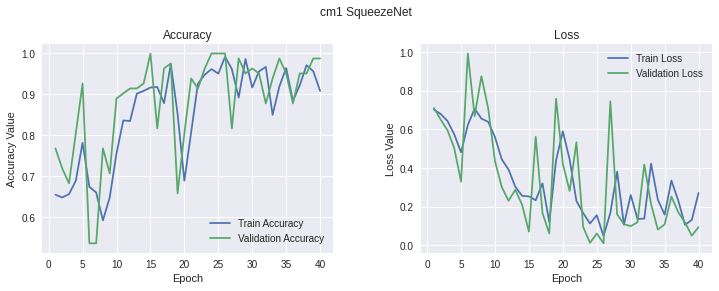

36.95080759299998


In [23]:
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_preprocessor('cm1.csv')
import time
start = time.process_time()
# your code here    
sq,y_val_matrix,x_val1 =squeezeNet(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"cm1")
print(time.process_time() - start)

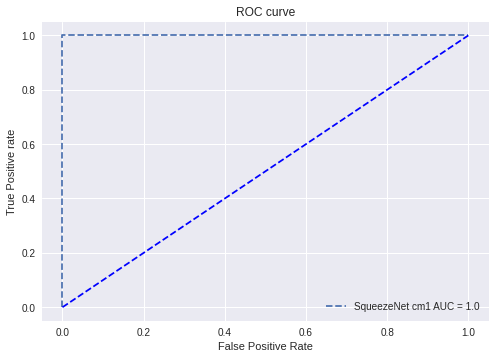

Confusion Matrix : 
 [[44  0]
 [ 0 38]]
Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0
MCC :  0.9999999999401913
Fscore :  1.0


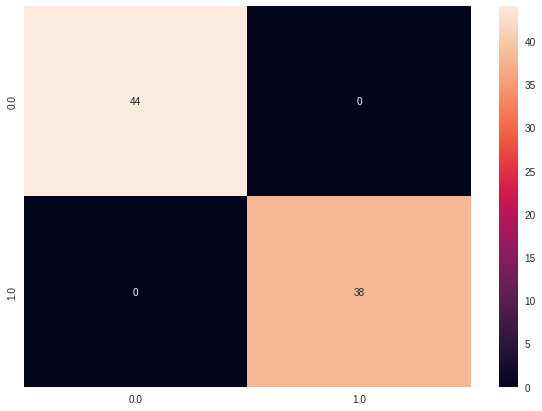

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        44
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

Accuracy: 1.0


In [27]:
roc_curve1(sq,y_val_matrix,x_val1,"cm1")
Y_val_pred = sq.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
91/91 [==============================] - 3s 18ms/step - loss: 0.7065 - accuracy: 0.7841 - val_loss: 0.2852 - val_accuracy: 0.9381
Epoch 2/40
91/91 [==============================] - 1s 12ms/step - loss: 0.3414 - accuracy: 0.9082 - val_loss: 0.2160 - val_accuracy: 0.9505
Epoch 3/40
91/91 [==============================] - 1s 10ms/step - loss: 0.2522 - accuracy: 0.9220 - val_loss: 0.2469 - val_accuracy: 0.9009
Epoch 4/40
91/91 [==============================] - 1s 10ms/step - loss: 0.2248 - accuracy: 0.9055 - val_loss: 0.2766 - val_accuracy: 0.9071
Epoch 5/40
91/91 [==============================] - 1s 11ms/step - loss: 0.1768 - accuracy: 0.9227 - val_loss: 0.1036 - val_accuracy: 0.9598
Epoch 6/40
91/91 [==============================] - 1s 11ms/step - loss: 0.1992 - accuracy: 0.9358 - val_loss: 0.2479 - val_accuracy: 0.9474
Epoch 7/40
91/91 [==============================] - 1s 12ms/step - loss: 0.2082 - accuracy: 0.9379 - val_loss: 0.1369 - val_accuracy: 0.9752
Epoch 8/40
91

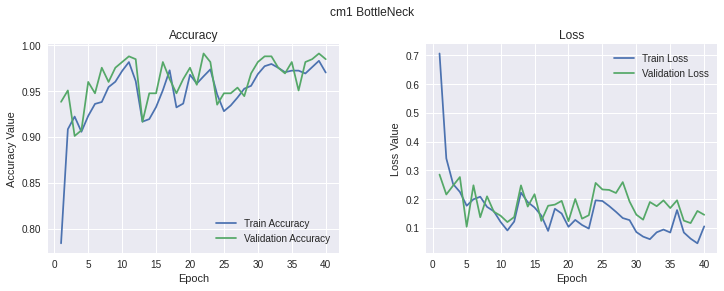

43.57202744599999


In [31]:

start = time.process_time()
bt,y_val_matrix,x_val1 =bottleNeck(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"cm1")
print(time.process_time() - start)


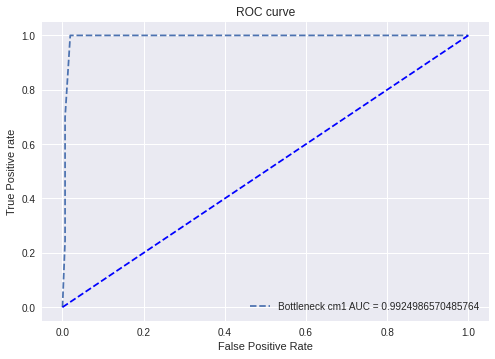

Confusion Matrix : 
 [[154   3]
 [  0 166]]
Accuracy :  0.9907120743034056
Sensitivity :  0.9808917197452229
Specificity :  1.0
MCC :  0.9815698857896428
Fscore :  0.9903536977491961


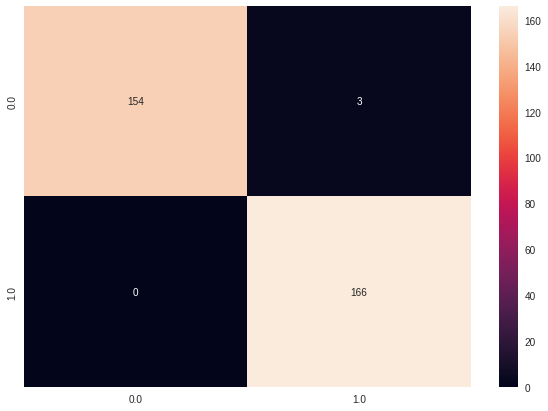

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       157
         1.0       0.98      1.00      0.99       166

    accuracy                           0.99       323
   macro avg       0.99      0.99      0.99       323
weighted avg       0.99      0.99      0.99       323

Accuracy: 0.9907120743034056


In [32]:
roc_curve2(bt,y_val_matrix,x_val1,"cm1")
Y_val_pred = bt.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
91/91 [==============================] - 5s 32ms/step - loss: 0.3650 - accuracy: 0.8720 - val_loss: 0.0593 - val_accuracy: 0.9814
Epoch 2/40
91/91 [==============================] - 2s 22ms/step - loss: 0.0515 - accuracy: 0.9807 - val_loss: 0.0599 - val_accuracy: 0.9783
Epoch 3/40
91/91 [==============================] - 2s 25ms/step - loss: 0.0297 - accuracy: 0.9914 - val_loss: 0.0334 - val_accuracy: 0.9907
Epoch 4/40
91/91 [==============================] - 2s 22ms/step - loss: 0.0499 - accuracy: 0.9821 - val_loss: 0.0540 - val_accuracy: 0.9814
Epoch 5/40
91/91 [==============================] - 2s 25ms/step - loss: 0.0338 - accuracy: 0.9903 - val_loss: 0.0263 - val_accuracy: 0.9969
Epoch 6/40
91/91 [==============================] - 3s 31ms/step - loss: 0.0186 - accuracy: 0.9931 - val_loss: 0.0262 - val_accuracy: 0.9969
Epoch 7/40
91/91 [==============================] - 3s 33ms/step - loss: 0.0584 - accuracy: 0.9828 - val_loss: 0.0681 - val_accuracy: 0.9938
Epoch 8/40
91

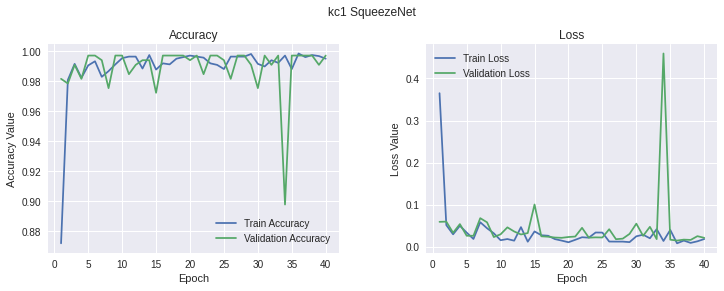

108.03323472699998


In [37]:
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_preprocessor('kc1.csv')

start = time.process_time()


sq,y_val_matrix,x_val1 =squeezeNet(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"kc1")
print(time.process_time() - start)

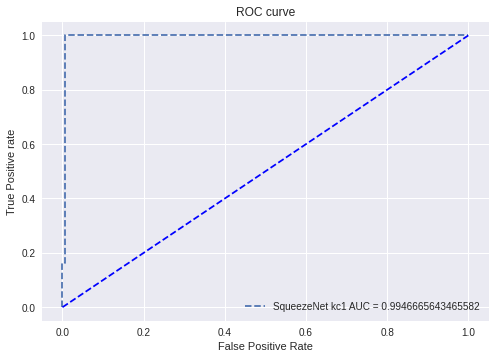

Confusion Matrix : 
 [[156   1]
 [  0 166]]
Accuracy :  0.9969040247678018
Sensitivity :  0.9936305732484076
Specificity :  1.0
MCC :  0.9938212563477803
Fscore :  0.9968051118210862


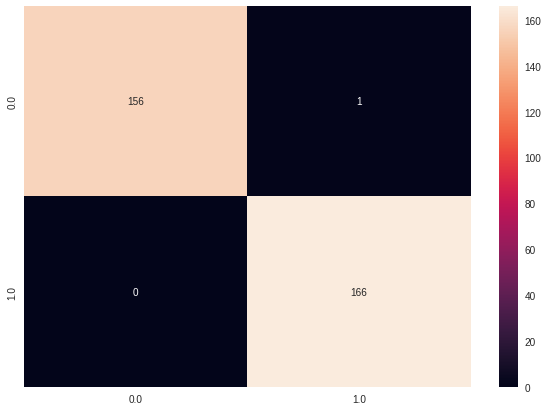

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       157
         1.0       0.99      1.00      1.00       166

    accuracy                           1.00       323
   macro avg       1.00      1.00      1.00       323
weighted avg       1.00      1.00      1.00       323

Accuracy: 0.9969040247678018


In [38]:
roc_curve1(sq,y_val_matrix,x_val1,"kc1")
Y_val_pred = sq.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
91/91 [==============================] - 2s 10ms/step - loss: 1.3914 - accuracy: 0.8186 - val_loss: 0.3920 - val_accuracy: 0.8916
Epoch 2/40
91/91 [==============================] - 1s 7ms/step - loss: 0.3159 - accuracy: 0.9131 - val_loss: 0.2205 - val_accuracy: 0.9598
Epoch 3/40
91/91 [==============================] - 1s 6ms/step - loss: 0.2574 - accuracy: 0.9386 - val_loss: 0.2032 - val_accuracy: 0.9567
Epoch 4/40
91/91 [==============================] - 1s 7ms/step - loss: 0.2050 - accuracy: 0.9479 - val_loss: 0.1386 - val_accuracy: 0.9845
Epoch 5/40
91/91 [==============================] - 1s 7ms/step - loss: 0.2036 - accuracy: 0.9303 - val_loss: 0.2060 - val_accuracy: 0.9381
Epoch 6/40
91/91 [==============================] - 1s 7ms/step - loss: 0.1982 - accuracy: 0.9286 - val_loss: 0.1857 - val_accuracy: 0.9474
Epoch 7/40
91/91 [==============================] - 1s 6ms/step - loss: 0.1645 - accuracy: 0.9455 - val_loss: 0.1585 - val_accuracy: 0.9628
Epoch 8/40
91/91 [=

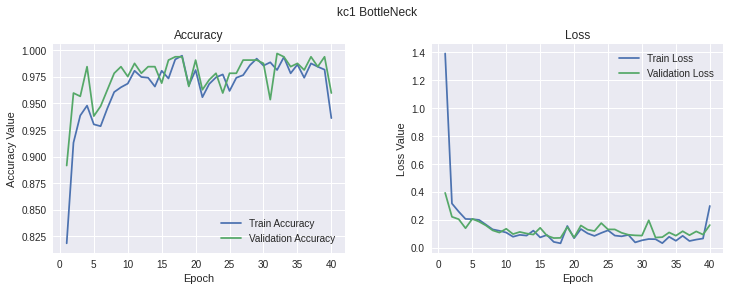

31.12127251000004


In [39]:
start = time.process_time()

bt,y_val_matrix,x_val1 =bottleNeck(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"kc1")

print(time.process_time() - start)

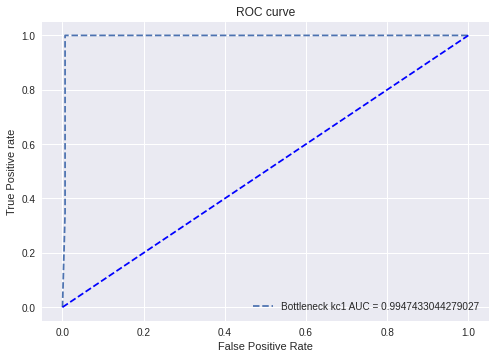

Confusion Matrix : 
 [[156   1]
 [  0 166]]
Accuracy :  0.9969040247678018
Sensitivity :  0.9936305732484076
Specificity :  1.0
MCC :  0.9938212563477803
Fscore :  0.9968051118210862


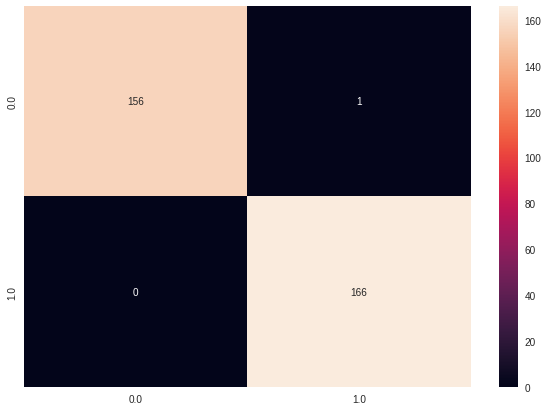

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       157
         1.0       0.99      1.00      1.00       166

    accuracy                           1.00       323
   macro avg       1.00      1.00      1.00       323
weighted avg       1.00      1.00      1.00       323

Accuracy: 0.9969040247678018


In [40]:
roc_curve2(bt,y_val_matrix,x_val1,"kc1")
Y_val_pred = bt.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
21/21 [==============================] - 4s 85ms/step - loss: 0.6713 - accuracy: 0.6252 - val_loss: 0.6375 - val_accuracy: 0.7733
Epoch 2/40
21/21 [==============================] - 0s 18ms/step - loss: 0.6372 - accuracy: 0.7436 - val_loss: 0.6149 - val_accuracy: 0.7600
Epoch 3/40
21/21 [==============================] - 1s 29ms/step - loss: 0.6512 - accuracy: 0.7346 - val_loss: 0.5922 - val_accuracy: 0.7867
Epoch 4/40
21/21 [==============================] - 0s 18ms/step - loss: 0.6007 - accuracy: 0.7721 - val_loss: 0.5858 - val_accuracy: 0.7867
Epoch 5/40
21/21 [==============================] - 1s 29ms/step - loss: 0.6055 - accuracy: 0.7811 - val_loss: 0.6045 - val_accuracy: 0.8000
Epoch 6/40
21/21 [==============================] - 0s 19ms/step - loss: 0.5603 - accuracy: 0.7691 - val_loss: 0.5844 - val_accuracy: 0.7467
Epoch 7/40
21/21 [==============================] - 0s 19ms/step - loss: 0.5295 - accuracy: 0.7841 - val_loss: 0.4921 - val_accuracy: 0.8000
Epoch 8/40
21

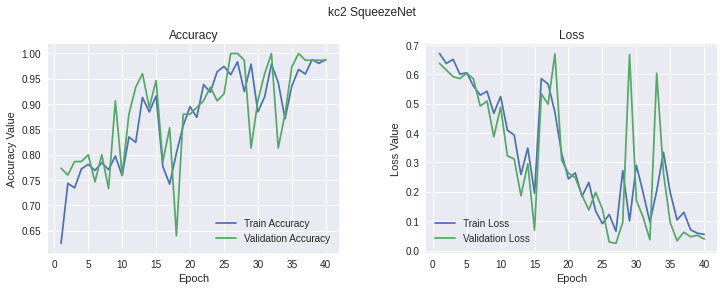

24.71516353900006


In [41]:
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_preprocessor('kc2.csv')

start = time.process_time()

sq,y_val_matrix,x_val1 =squeezeNet(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"kc2")

print(time.process_time() - start)


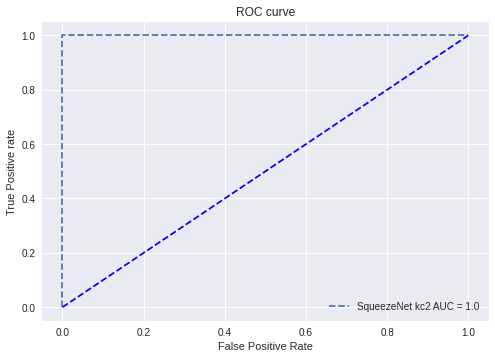

Confusion Matrix : 
 [[34  0]
 [ 0 41]]
Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0
MCC :  0.9999999999282639
Fscore :  1.0


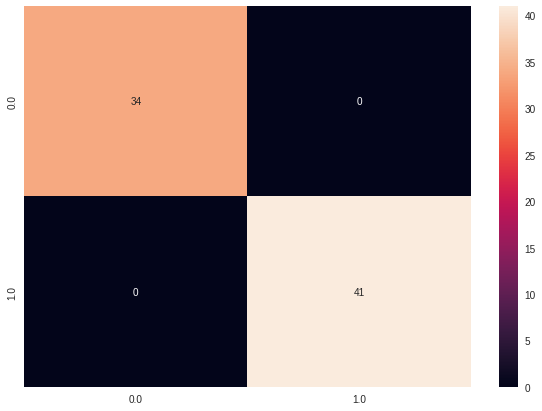

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        34
         1.0       1.00      1.00      1.00        41

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Accuracy: 1.0


In [42]:
roc_curve1(sq,y_val_matrix,x_val1,"kc2")
Y_val_pred = sq.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
21/21 [==============================] - 2s 27ms/step - loss: 36.9122 - accuracy: 0.5337 - val_loss: 2.4321 - val_accuracy: 0.6533
Epoch 2/40
21/21 [==============================] - 0s 8ms/step - loss: 1.4217 - accuracy: 0.6342 - val_loss: 0.7608 - val_accuracy: 0.4933
Epoch 3/40
21/21 [==============================] - 0s 10ms/step - loss: 0.5845 - accuracy: 0.7496 - val_loss: 0.5482 - val_accuracy: 0.8533
Epoch 4/40
21/21 [==============================] - 0s 7ms/step - loss: 2.8653 - accuracy: 0.7106 - val_loss: 3.5282 - val_accuracy: 0.7733
Epoch 5/40
21/21 [==============================] - 0s 8ms/step - loss: 2.7375 - accuracy: 0.7211 - val_loss: 1.6906 - val_accuracy: 0.8267
Epoch 6/40
21/21 [==============================] - 0s 8ms/step - loss: 1.0934 - accuracy: 0.7541 - val_loss: 1.3454 - val_accuracy: 0.7733
Epoch 7/40
21/21 [==============================] - 0s 7ms/step - loss: 0.9010 - accuracy: 0.8291 - val_loss: 0.5472 - val_accuracy: 0.7867
Epoch 8/40
21/21 

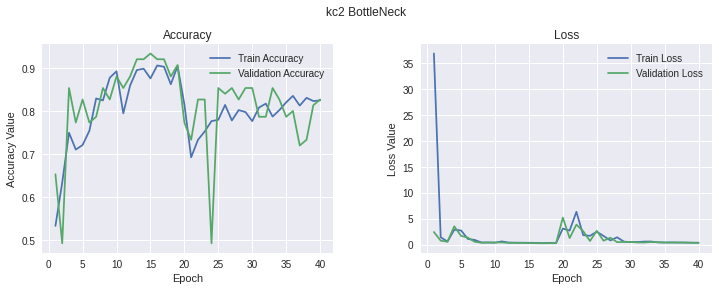

10.478738658999987


In [43]:
start = time.process_time()

bt,y_val_matrix,x_val1 =bottleNeck(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"kc2")

print(time.process_time() - start)


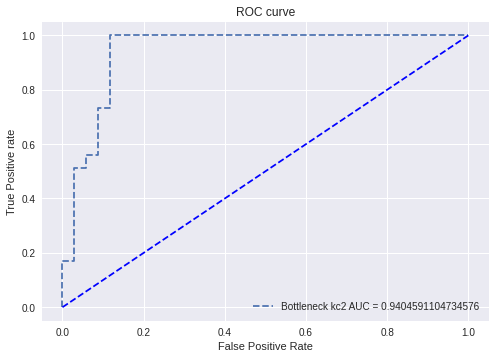

Confusion Matrix : 
 [[29  5]
 [ 0 41]]
Accuracy :  0.9333333333333333
Sensitivity :  0.8529411764705882
Specificity :  1.0
MCC :  0.8719117953764791
Fscore :  0.9206349206349206


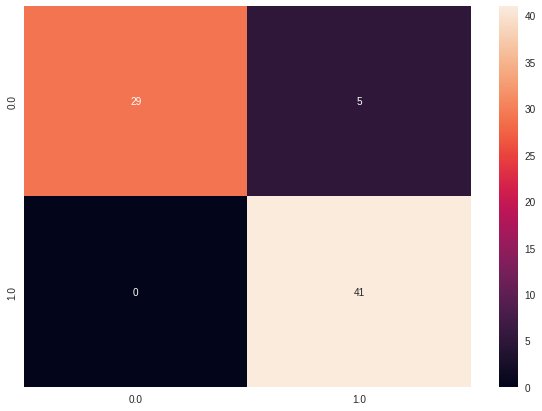

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        34
         1.0       0.89      1.00      0.94        41

    accuracy                           0.93        75
   macro avg       0.95      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75

Accuracy: 0.9333333333333333


In [44]:
roc_curve2(bt,y_val_matrix,x_val1,"kc2")
Y_val_pred = bt.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
476/476 [==============================] - 14s 23ms/step - loss: 0.3425 - accuracy: 0.8558 - val_loss: 0.2212 - val_accuracy: 0.9149
Epoch 2/40
476/476 [==============================] - 9s 20ms/step - loss: 0.1890 - accuracy: 0.9277 - val_loss: 0.1297 - val_accuracy: 0.9563
Epoch 3/40
476/476 [==============================] - 9s 19ms/step - loss: 0.1284 - accuracy: 0.9544 - val_loss: 0.1470 - val_accuracy: 0.9521
Epoch 4/40
476/476 [==============================] - 10s 21ms/step - loss: 0.1039 - accuracy: 0.9640 - val_loss: 0.0747 - val_accuracy: 0.9746
Epoch 5/40
476/476 [==============================] - 9s 20ms/step - loss: 0.1022 - accuracy: 0.9664 - val_loss: 0.1380 - val_accuracy: 0.9610
Epoch 6/40
476/476 [==============================] - 10s 21ms/step - loss: 0.0802 - accuracy: 0.9747 - val_loss: 0.0459 - val_accuracy: 0.9846
Epoch 7/40
476/476 [==============================] - 10s 21ms/step - loss: 0.0655 - accuracy: 0.9794 - val_loss: 0.0603 - val_accuracy: 0.

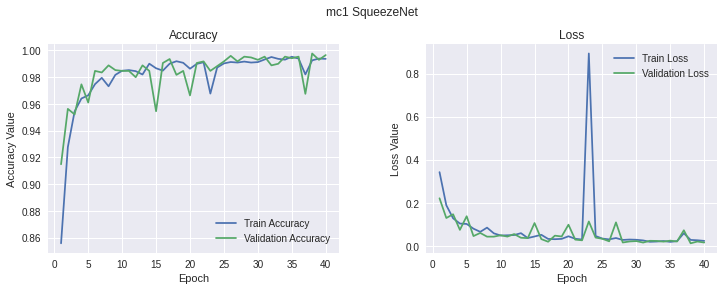

416.0681257499999


In [45]:
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_preprocessor('mc1.csv')

start = time.process_time()

sq,y_val_matrix,x_val1 =squeezeNet(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"mc1")

print(time.process_time() - start)



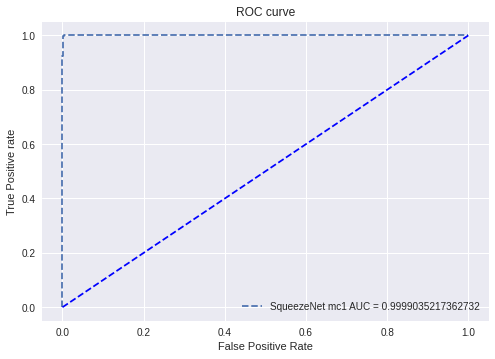

Confusion Matrix : 
 [[867   2]
 [  2 821]]
Accuracy :  0.9976359338061466
Sensitivity :  0.997698504027618
Specificity :  0.9975698663426489
MCC :  0.9952683703701276
Fscore :  0.997698504027618


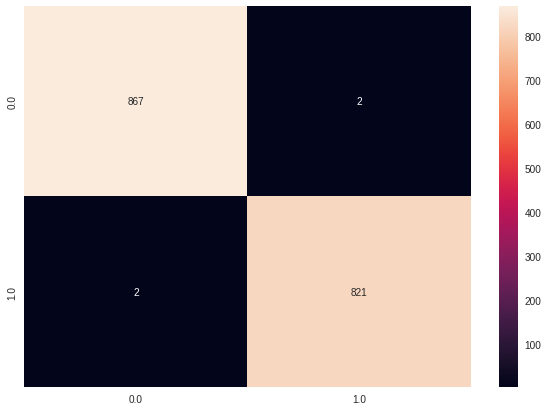

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       869
         1.0       1.00      1.00      1.00       823

    accuracy                           1.00      1692
   macro avg       1.00      1.00      1.00      1692
weighted avg       1.00      1.00      1.00      1692

Accuracy: 0.9976359338061466


In [46]:
roc_curve1(sq,y_val_matrix,x_val1,"mc1")
Y_val_pred = sq.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
476/476 [==============================] - 4s 7ms/step - loss: 0.7268 - accuracy: 0.8130 - val_loss: 0.3851 - val_accuracy: 0.8457
Epoch 2/40
476/476 [==============================] - 3s 6ms/step - loss: 0.3930 - accuracy: 0.8449 - val_loss: 0.3526 - val_accuracy: 0.8463
Epoch 3/40
476/476 [==============================] - 3s 6ms/step - loss: 0.3465 - accuracy: 0.8599 - val_loss: 0.3156 - val_accuracy: 0.8706
Epoch 4/40
476/476 [==============================] - 3s 6ms/step - loss: 0.3092 - accuracy: 0.8770 - val_loss: 0.3131 - val_accuracy: 0.8723
Epoch 5/40
476/476 [==============================] - 3s 6ms/step - loss: 0.2983 - accuracy: 0.8825 - val_loss: 0.2995 - val_accuracy: 0.8818
Epoch 6/40
476/476 [==============================] - 3s 6ms/step - loss: 0.2751 - accuracy: 0.8953 - val_loss: 0.2690 - val_accuracy: 0.8948
Epoch 7/40
476/476 [==============================] - 3s 6ms/step - loss: 0.2681 - accuracy: 0.8985 - val_loss: 0.2550 - val_accuracy: 0.9054
Epoch 

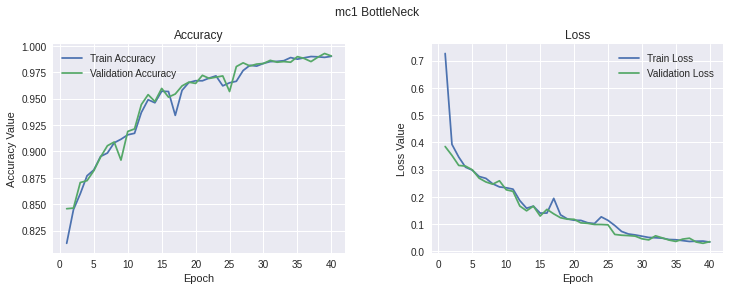

143.45185711600016


In [47]:

start = time.process_time()

bt,y_val_matrix,x_val1 =bottleNeck(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"mc1")

print(time.process_time() - start)

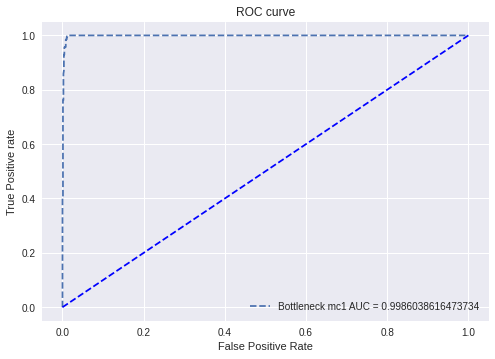

Confusion Matrix : 
 [[859  10]
 [  2 821]]
Accuracy :  0.9929078014184397
Sensitivity :  0.9884925201380897
Specificity :  0.9975698663426489
MCC :  0.9858528836264019
Fscore :  0.9930635838150289


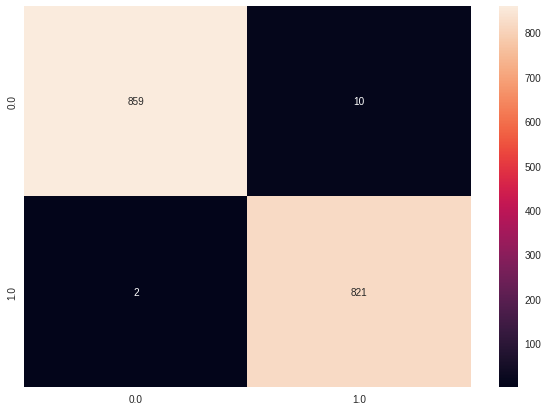

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       869
         1.0       0.99      1.00      0.99       823

    accuracy                           0.99      1692
   macro avg       0.99      0.99      0.99      1692
weighted avg       0.99      0.99      0.99      1692

Accuracy: 0.9929078014184397


In [48]:
roc_curve2(bt,y_val_matrix,x_val1,"mc1")
Y_val_pred = bt.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
445/445 [==============================] - 13s 23ms/step - loss: 0.1424 - accuracy: 0.9416 - val_loss: 0.0220 - val_accuracy: 0.9949
Epoch 2/40
445/445 [==============================] - 8s 18ms/step - loss: 0.0377 - accuracy: 0.9863 - val_loss: 0.0281 - val_accuracy: 0.9918
Epoch 3/40
445/445 [==============================] - 8s 18ms/step - loss: 0.0412 - accuracy: 0.9857 - val_loss: 0.0534 - val_accuracy: 0.9798
Epoch 4/40
445/445 [==============================] - 8s 18ms/step - loss: 0.0250 - accuracy: 0.9912 - val_loss: 0.0197 - val_accuracy: 0.9949
Epoch 5/40
445/445 [==============================] - 8s 18ms/step - loss: 0.0517 - accuracy: 0.9825 - val_loss: 0.0239 - val_accuracy: 0.9943
Epoch 6/40
445/445 [==============================] - 8s 19ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0116 - val_accuracy: 0.9981
Epoch 7/40
445/445 [==============================] - 8s 19ms/step - loss: 0.0266 - accuracy: 0.9905 - val_loss: 0.0331 - val_accuracy: 0.987

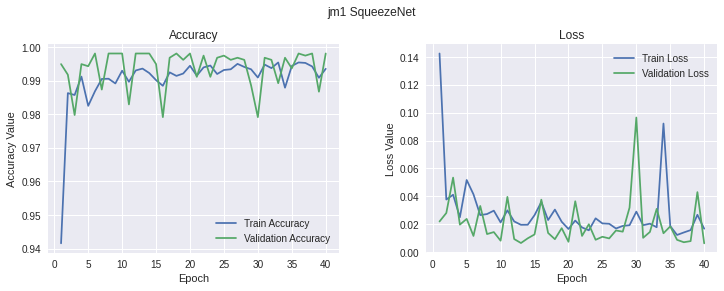

370.4038861079998


In [49]:
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_preprocessor('jm1.csv')

start = time.process_time()

sq,y_val_matrix,x_val1 =squeezeNet(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"jm1")

print(time.process_time() - start)


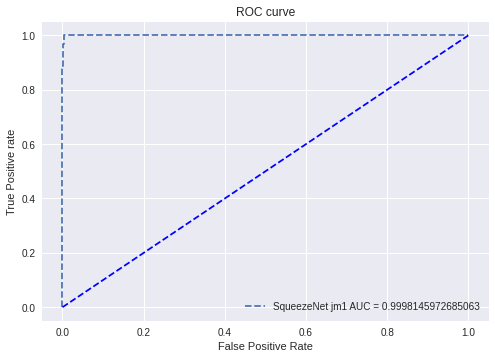

Confusion Matrix : 
 [[784   3]
 [  0 795]]
Accuracy :  0.9981036662452591
Sensitivity :  0.9961880559085133
Specificity :  1.0
MCC :  0.9962143283595357
Fscore :  0.9980903882877148


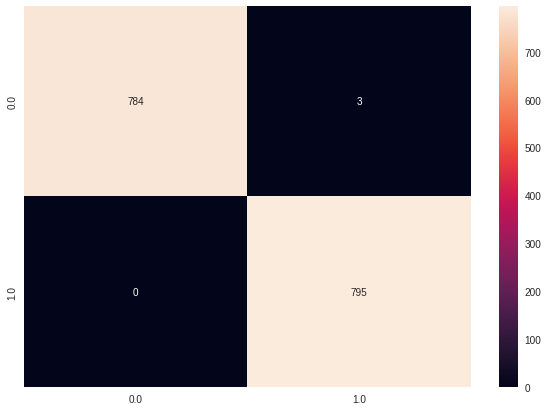

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       787
         1.0       1.00      1.00      1.00       795

    accuracy                           1.00      1582
   macro avg       1.00      1.00      1.00      1582
weighted avg       1.00      1.00      1.00      1582

Accuracy: 0.9981036662452591


In [50]:
roc_curve1(sq,y_val_matrix,x_val1,"jm1")
Y_val_pred = sq.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
445/445 [==============================] - 4s 7ms/step - loss: 12.4241 - accuracy: 0.7884 - val_loss: 0.6325 - val_accuracy: 0.9071
Epoch 2/40
445/445 [==============================] - 3s 7ms/step - loss: 6.8464 - accuracy: 0.9048 - val_loss: 0.3818 - val_accuracy: 0.9665
Epoch 3/40
445/445 [==============================] - 3s 6ms/step - loss: 2.0921 - accuracy: 0.9231 - val_loss: 0.3694 - val_accuracy: 0.9355
Epoch 4/40
445/445 [==============================] - 3s 7ms/step - loss: 0.2571 - accuracy: 0.9151 - val_loss: 0.1573 - val_accuracy: 0.9412
Epoch 5/40
445/445 [==============================] - 3s 6ms/step - loss: 0.2104 - accuracy: 0.9307 - val_loss: 0.2048 - val_accuracy: 0.9147
Epoch 6/40
445/445 [==============================] - 3s 7ms/step - loss: 0.1896 - accuracy: 0.9218 - val_loss: 0.1629 - val_accuracy: 0.9317
Epoch 7/40
445/445 [==============================] - 3s 6ms/step - loss: 0.1423 - accuracy: 0.9385 - val_loss: 0.1388 - val_accuracy: 0.9431
Epoch

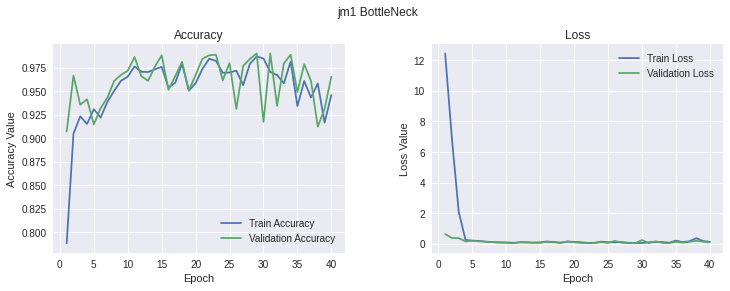

142.18018946200004


In [51]:
start = time.process_time()

bt,y_val_matrix,x_val1 =bottleNeck(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"jm1")

print(time.process_time() - start)



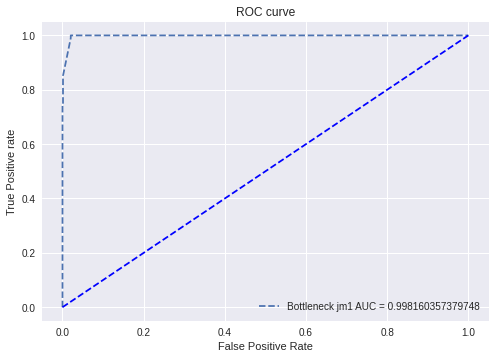

Confusion Matrix : 
 [[771  16]
 [  0 795]]
Accuracy :  0.9898862199747156
Sensitivity :  0.9796696315120712
Specificity :  1.0
MCC :  0.979970404603477
Fscore :  0.9897304236200257


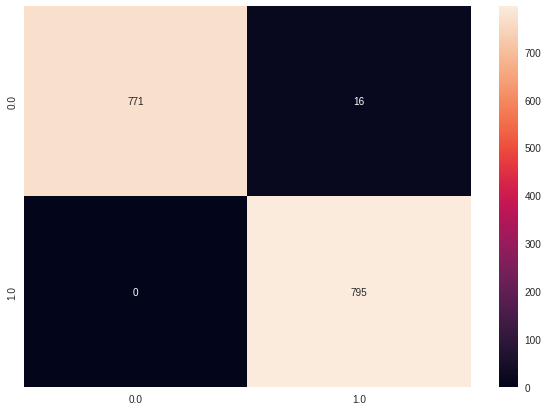

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       787
         1.0       0.98      1.00      0.99       795

    accuracy                           0.99      1582
   macro avg       0.99      0.99      0.99      1582
weighted avg       0.99      0.99      0.99      1582

Accuracy: 0.9898862199747156


In [52]:
roc_curve2(bt,y_val_matrix,x_val1,"jm1")
Y_val_pred = bt.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
19/19 [==============================] - 5s 94ms/step - loss: 0.6758 - accuracy: 0.6118 - val_loss: 0.7162 - val_accuracy: 0.6716
Epoch 2/40
19/19 [==============================] - 1s 33ms/step - loss: 0.6744 - accuracy: 0.6622 - val_loss: 0.6695 - val_accuracy: 0.7015
Epoch 3/40
19/19 [==============================] - 0s 22ms/step - loss: 0.6748 - accuracy: 0.5328 - val_loss: 0.6628 - val_accuracy: 0.6716
Epoch 4/40
19/19 [==============================] - 0s 21ms/step - loss: 2.1001 - accuracy: 0.5882 - val_loss: 0.6764 - val_accuracy: 0.6418
Epoch 5/40
19/19 [==============================] - 0s 22ms/step - loss: 0.7315 - accuracy: 0.6034 - val_loss: 0.6393 - val_accuracy: 0.7015
Epoch 6/40
19/19 [==============================] - 1s 33ms/step - loss: 0.5880 - accuracy: 0.6555 - val_loss: 0.6394 - val_accuracy: 0.7313
Epoch 7/40
19/19 [==============================] - 0s 23ms/step - loss: 0.5874 - accuracy: 0.6521 - val_loss: 0.6414 - val_accuracy: 0.7313
Epoch 8/40
19

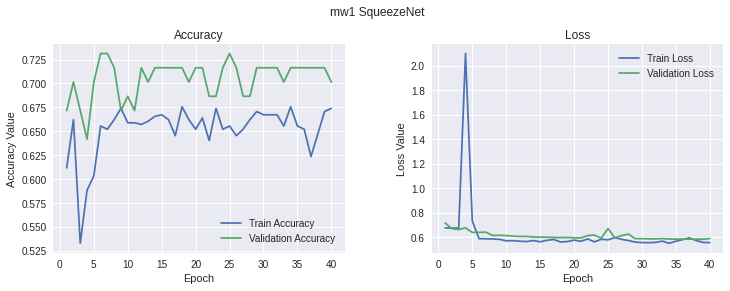

24.644157862000156


In [53]:
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_preprocessor('mw1.csv')
start = time.process_time()

sq,y_val_matrix,x_val1 =squeezeNet(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"mw1")

print(time.process_time() - start)




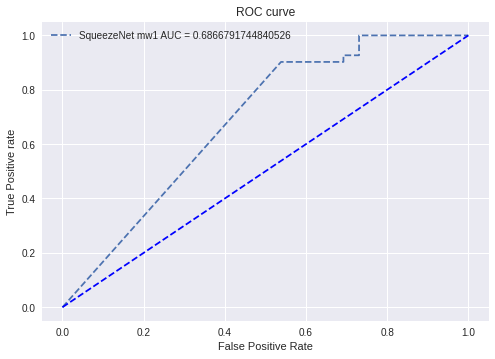

Confusion Matrix : 
 [[12 14]
 [ 4 37]]
Accuracy :  0.7313432835820896
Sensitivity :  0.46153846153846156
Specificity :  0.9024390243902439
MCC :  0.4160140936497969
Fscore :  0.5714285714285714


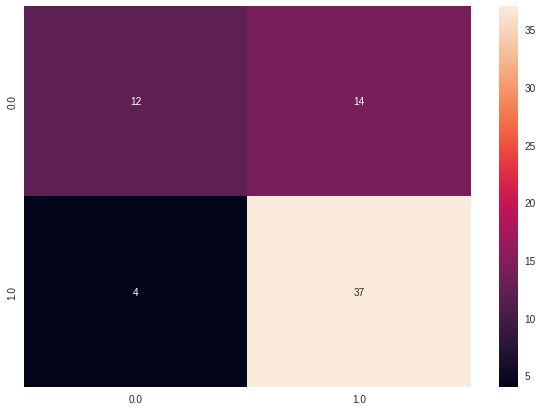

              precision    recall  f1-score   support

         0.0       0.75      0.46      0.57        26
         1.0       0.73      0.90      0.80        41

    accuracy                           0.73        67
   macro avg       0.74      0.68      0.69        67
weighted avg       0.74      0.73      0.71        67

Accuracy: 0.7313432835820896


In [54]:
roc_curve1(sq,y_val_matrix,x_val1,"mw1")
Y_val_pred = sq.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
19/19 [==============================] - 1s 31ms/step - loss: 6.8445 - accuracy: 0.5731 - val_loss: 0.9588 - val_accuracy: 0.5522
Epoch 2/40
19/19 [==============================] - 0s 12ms/step - loss: 2.4190 - accuracy: 0.6118 - val_loss: 0.6986 - val_accuracy: 0.6866
Epoch 3/40
19/19 [==============================] - 0s 10ms/step - loss: 2.2276 - accuracy: 0.6353 - val_loss: 2.3702 - val_accuracy: 0.7313
Epoch 4/40
19/19 [==============================] - 0s 8ms/step - loss: 2.4299 - accuracy: 0.6336 - val_loss: 1.1412 - val_accuracy: 0.4776
Epoch 5/40
19/19 [==============================] - 0s 9ms/step - loss: 1.6076 - accuracy: 0.6739 - val_loss: 2.7059 - val_accuracy: 0.3731
Epoch 6/40
19/19 [==============================] - 0s 9ms/step - loss: 1.2139 - accuracy: 0.6185 - val_loss: 1.2256 - val_accuracy: 0.4179
Epoch 7/40
19/19 [==============================] - 0s 8ms/step - loss: 1.0070 - accuracy: 0.6840 - val_loss: 0.6712 - val_accuracy: 0.7015
Epoch 8/40
19/19 

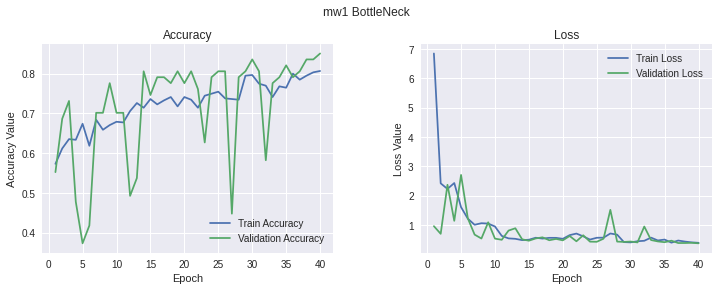

10.160633097000073


In [55]:
start = time.process_time()

bt,y_val_matrix,x_val1 =bottleNeck(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"mw1")

print(time.process_time() - start)


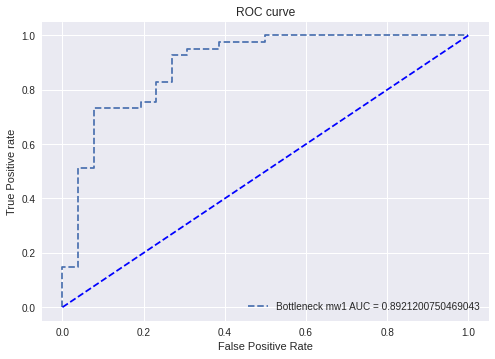

Confusion Matrix : 
 [[19  7]
 [ 3 38]]
Accuracy :  0.8507462686567164
Sensitivity :  0.7307692307692307
Specificity :  0.926829268292683
MCC :  0.6823729746391151
Fscore :  0.7916666666666666


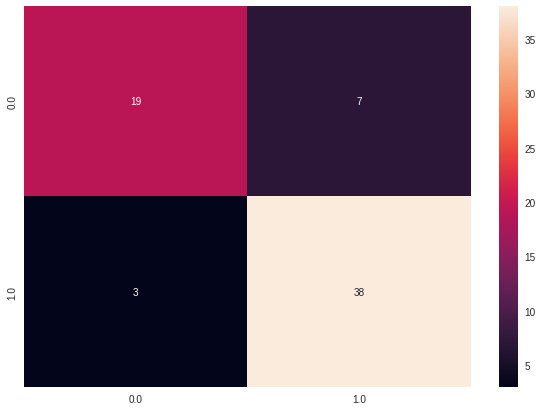

              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79        26
         1.0       0.84      0.93      0.88        41

    accuracy                           0.85        67
   macro avg       0.85      0.83      0.84        67
weighted avg       0.85      0.85      0.85        67

Accuracy: 0.8507462686567164


In [56]:
roc_curve2(bt,y_val_matrix,x_val1,"mw1")
Y_val_pred = bt.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
65/65 [==============================] - 5s 45ms/step - loss: 0.6697 - accuracy: 0.6051 - val_loss: 0.6726 - val_accuracy: 0.6652
Epoch 2/40
65/65 [==============================] - 1s 20ms/step - loss: 0.6558 - accuracy: 0.6284 - val_loss: 0.6312 - val_accuracy: 0.6304
Epoch 3/40
65/65 [==============================] - 1s 23ms/step - loss: 0.6397 - accuracy: 0.6202 - val_loss: 0.6214 - val_accuracy: 0.6957
Epoch 4/40
65/65 [==============================] - 1s 20ms/step - loss: 0.5563 - accuracy: 0.7243 - val_loss: 0.5616 - val_accuracy: 0.6870
Epoch 5/40
65/65 [==============================] - 1s 20ms/step - loss: 0.6216 - accuracy: 0.6701 - val_loss: 0.6534 - val_accuracy: 0.6391
Epoch 6/40
65/65 [==============================] - 1s 20ms/step - loss: 0.6519 - accuracy: 0.6129 - val_loss: 0.6549 - val_accuracy: 0.6348
Epoch 7/40
65/65 [==============================] - 1s 23ms/step - loss: 0.6244 - accuracy: 0.6628 - val_loss: 0.5478 - val_accuracy: 0.7565
Epoch 8/40
65

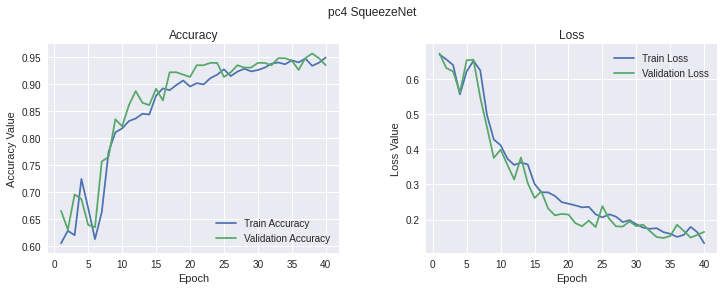

65.86229127599995


In [57]:
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_preprocessor('pc4.csv')
start = time.process_time()

sq,y_val_matrix,x_val1 =squeezeNet(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"pc4")

print(time.process_time() - start)



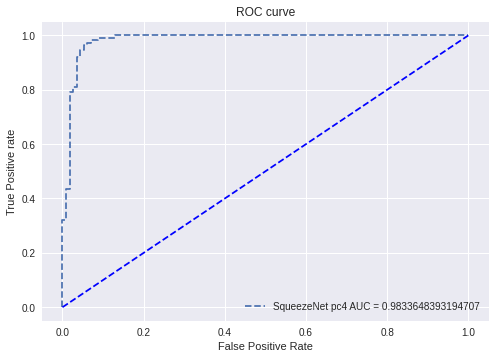

Confusion Matrix : 
 [[108   7]
 [  3 112]]
Accuracy :  0.9565217391304348
Sensitivity :  0.9391304347826087
Specificity :  0.9739130434782609
MCC :  0.9135962935491441
Fscore :  0.9557522123893806


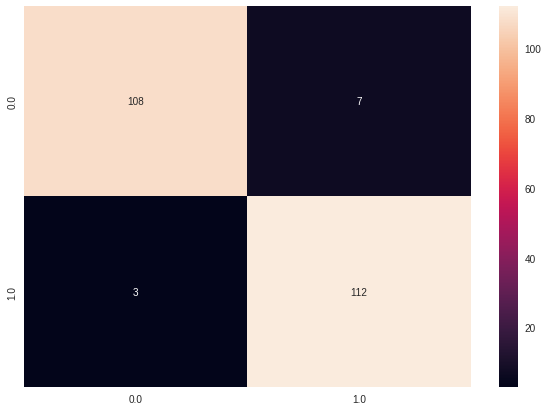

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       115
         1.0       0.94      0.97      0.96       115

    accuracy                           0.96       230
   macro avg       0.96      0.96      0.96       230
weighted avg       0.96      0.96      0.96       230

Accuracy: 0.9565217391304348


In [58]:
roc_curve1(sq,y_val_matrix,x_val1,"pc4")
Y_val_pred = sq.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))

Epoch 1/40
65/65 [==============================] - 2s 14ms/step - loss: 4.1755 - accuracy: 0.5276 - val_loss: 0.6861 - val_accuracy: 0.5000
Epoch 2/40
65/65 [==============================] - 0s 8ms/step - loss: 0.5971 - accuracy: 0.7495 - val_loss: 0.4427 - val_accuracy: 0.8348
Epoch 3/40
65/65 [==============================] - 0s 8ms/step - loss: 0.4098 - accuracy: 0.8241 - val_loss: 0.3326 - val_accuracy: 0.8739
Epoch 4/40
65/65 [==============================] - 1s 8ms/step - loss: 0.3382 - accuracy: 0.8537 - val_loss: 0.2767 - val_accuracy: 0.9000
Epoch 5/40
65/65 [==============================] - 1s 8ms/step - loss: 0.3089 - accuracy: 0.8702 - val_loss: 0.2587 - val_accuracy: 0.9130
Epoch 6/40
65/65 [==============================] - 0s 7ms/step - loss: 0.2994 - accuracy: 0.8818 - val_loss: 0.2550 - val_accuracy: 0.8957
Epoch 7/40
65/65 [==============================] - 0s 6ms/step - loss: 0.2877 - accuracy: 0.8828 - val_loss: 0.2487 - val_accuracy: 0.9087
Epoch 8/40
65/65 [=

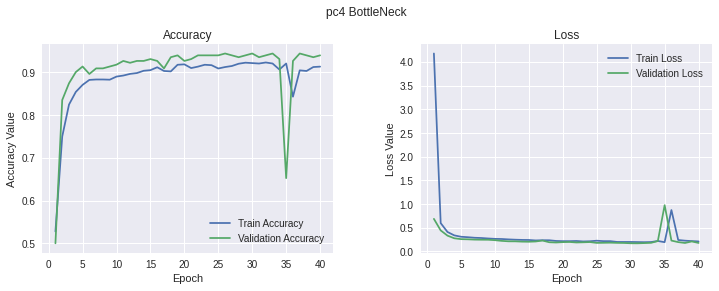

24.924016993000123


In [59]:
start = time.process_time()

bt,y_val_matrix,x_val1 =bottleNeck(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val,"pc4")

print(time.process_time() - start)



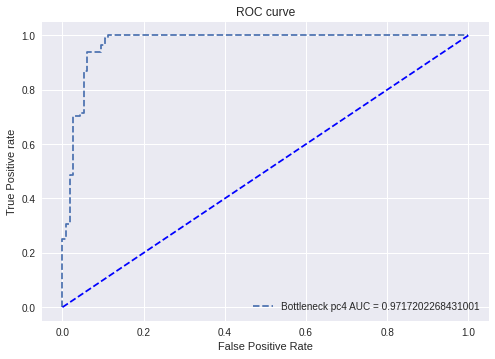

Confusion Matrix : 
 [[103  12]
 [  1 114]]
Accuracy :  0.9434782608695652
Sensitivity :  0.8956521739130435
Specificity :  0.991304347826087
MCC :  0.8910421112068618
Fscore :  0.9406392694063926


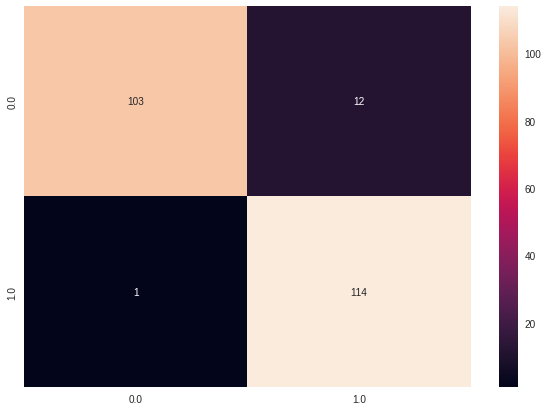

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       115
         1.0       0.90      0.99      0.95       115

    accuracy                           0.94       230
   macro avg       0.95      0.94      0.94       230
weighted avg       0.95      0.94      0.94       230

Accuracy: 0.9434782608695652


In [60]:
roc_curve2(bt,y_val_matrix,x_val1,"pc4")
Y_val_pred = bt.predict(x_val1)
Y_val_pred=np.rint(Y_val_pred)
y_val_matrix=np.rint(y_val_matrix)
# print(Y_val_pred)
print_cmx(y_val_matrix, Y_val_pred)
print(classification_report(y_val_matrix, Y_val_pred))
print("Accuracy: {0}".format(accuracy_score(y_val_matrix, Y_val_pred)))